In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Spotify-2000.csv'
df = pd.read_csv(file_path)
print(df.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select numeric feature columns for training (exclude non-feature columns)
feature_columns = [
	'Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
	'Liveness', 'Valence', 'Acousticness', 'Speechiness', 'Popularity'
]
X = df[feature_columns].values

# Split into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Check for NaNs/Infs and handle them
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Normalize data between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

input_dim = X_train.shape[1]
encoding_dim = 64  # Reduced dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)  # sigmoid for scaled data

autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,274 (75.29 KB)

 Trainable params: 19,274 (75.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test)
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0802 - val_loss: 0.0698
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0665 - val_loss: 0.0541
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516 - val_loss: 0.0406
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0403 - val_loss: 0.0347
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0351 - val_loss: 0.0311
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0314 - val_loss: 0.0276
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0275 - val_loss: 0.0245
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0247 - val_loss: 0.0218
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0209 - val_loss: 0.0194
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - val_loss: 0.0174
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0171 - val_loss: 0.0157
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - val


Autoencoder training complete!


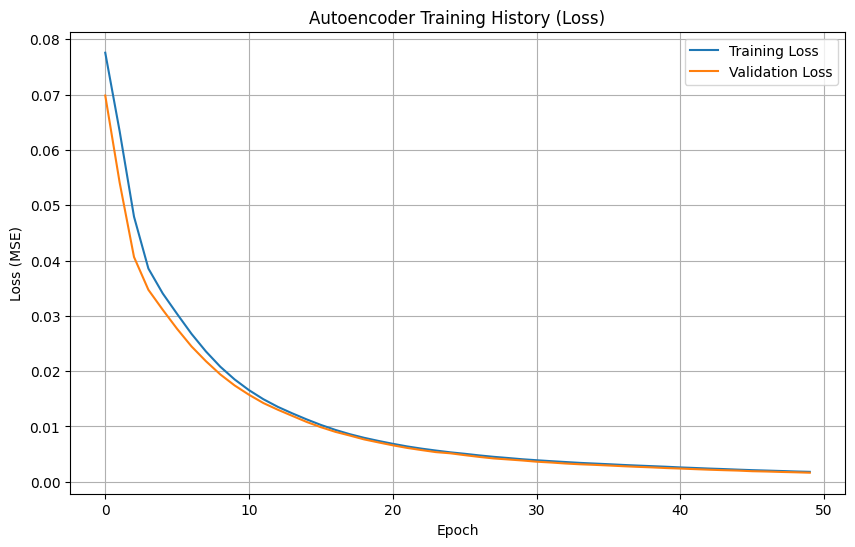

In [7]:
print("\nAutoencoder training complete!")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# @title 5. Generate Song Embeddings and Calculate Similarity

# Define the encoder model to extract embeddings
encoder = Model(inputs=input_layer, outputs=encoded)

# Prepare the scaled data for all songs
X_scaled = scaler.transform(X)

# Get the song embeddings from the trained encoder
song_embeddings = encoder.predict(X_scaled)
print(f"Generated {song_embeddings.shape[0]} song embeddings of dimension {song_embeddings.shape[1]}")

# Calculate the cosine similarity matrix
# This matrix tells us how similar each song's embedding is to every other song's embedding.
similarity_matrix = cosine_similarity(song_embeddings)

print("\nCosine similarity matrix generated.")
# print("First 5x5 block of similarity matrix:")
# print(similarity_matrix[:5, :5])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Generated 1994 song embeddings of dimension 64

Cosine similarity matrix generated.
